In [101]:
import pandas
import zipfile
import numpy as np
zip_ref = zipfile.ZipFile("train.csv.zip", 'r')
zip_ref.extractall()
zip_ref.close()
zip_ref2 = zipfile.ZipFile("test.csv.zip", 'r')
zip_ref2.extractall()
zip_ref2.close()

In [102]:
train_data = pandas.read_csv("train.csv")
test_data = pandas.read_csv("test.csv")
test_data['loss'] = np.nan
ids = test_data['id']

test_data.drop("id", 1,inplace = True)


In [103]:
train_data.drop("id",axis = 1,inplace = True)
train_data.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [104]:
print (train_data.shape)
print (test_data.shape)
X_train_end = train_data.shape[0]-1
X_test_start = train_data.shape[0]
X_test_end = train_data.shape[0] + test_data.shape[0]


(188318, 131)
(125546, 131)


In [105]:
joined = pandas.concat([train_data, test_data],ignore_index = True)
del train_data,test_data

In [99]:
joined.describe()
print joined.iloc[0:X_test_end,:]

       cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10    ...        cont6  \
0         A    B    A    B    A    A    A    A    B     A    ...     0.718367   
1         A    B    A    A    A    A    A    A    B     B    ...     0.438917   
2         A    B    A    A    B    A    A    A    B     B    ...     0.289648   
3         B    B    A    B    A    A    A    A    B     A    ...     0.440945   
4         A    B    A    B    A    A    A    A    B     B    ...     0.178193   
5         A    B    A    A    A    A    A    A    B     A    ...     0.364464   
6         A    A    A    A    B    A    A    A    A     A    ...     0.381515   
7         A    B    A    B    A    A    A    A    B     A    ...     0.867021   
8         A    B    B    B    B    A    A    A    B     B    ...     0.628534   
9         A    B    A    A    B    B    A    A    B     A    ...     0.713343   
10        A    B    A    A    A    A    A    A    B     B    ...     0.429383   
11        A    B    A    A  

In [100]:
print (joined.skew())

KeyboardInterrupt: 

In [ ]:

#upper = train_data.shape[0]
upper = X_test_end
train_data = joined.iloc[0:upper,:]
#import plotting libraries
#import seaborn as sns
import matplotlib.pyplot as plt

#range of features considered
split = 116 

#number of features considered
size = 15

#create a dataframe with only continuous features
data=train_data.iloc[:,split:] 

#get the names of all the columns
cols=data.columns 

data.plot(kind='density', subplots=True, layout=(15,15), sharex=False)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#range of features considered
split = 116
#number of features considered
size = 15

#create a dataframe with only continuous features
data=train_data.iloc[:,split:] 
#get the names of all the columns
cols=data.columns 

#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=train_data, ax=ax[j])


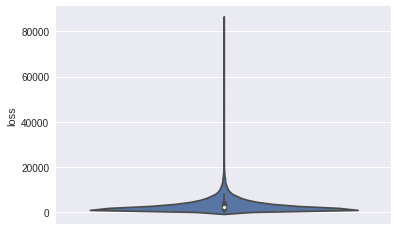

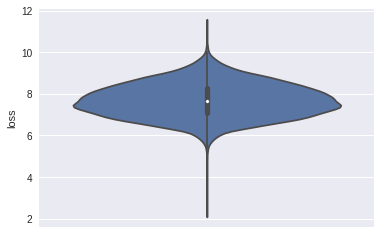

In [9]:
import copy
trial_data = copy.deepcopy(train_data)
#print trial_data.iloc[18001+1359,split+size-1]
train_data = copy.deepcopy(trial_data)
sns.violinplot(data = train_data, y = "loss")
plt.show()
shift = 700
train_data["loss"] = np.log(train_data["loss"])
sns.violinplot(data = train_data, y = "loss")
plt.show()


In [10]:


data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.81
cont1 and cont10 = 0.80
cont6 and cont9 = 0.79
cont9 and cont10 = 0.78
cont6 and cont12 = 0.78
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.70
cont10 and cont11 = 0.70
cont6 and cont7 = 0.65
cont9 and cont13 = 0.64
cont9 and cont12 = 0.62
cont1 and cont12 = 0.61
cont9 and cont11 = 0.60
cont1 and cont11 = 0.59
cont1 and cont13 = 0.53
cont4 and cont8 = 0.52


In [18]:
cat_feature = [n for n in train_data.columns if n.startswith('cat')]    
cont_feature = [n for n in train_data.columns if n.startswith('cont')] 

for column in cat_feature:
        train_data[column] = pandas.factorize(train_data[column].values, sort=True)[0]
        
print train_data

       cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10    ...     \
0         0     1     0     1     0     0     0     0     1      0    ...      
1         0     1     0     0     0     0     0     0     1      1    ...      
2         0     1     0     0     1     0     0     0     1      1    ...      
3         1     1     0     1     0     0     0     0     1      0    ...      
4         0     1     0     1     0     0     0     0     1      1    ...      
5         0     1     0     0     0     0     0     0     1      0    ...      
6         0     0     0     0     1     0     0     0     0      0    ...      
7         0     1     0     1     0     0     0     0     1      0    ...      
8         0     1     1     1     1     0     0     0     1      1    ...      
9         0     1     0     0     1     1     0     0     1      0    ...      
10        0     1     0     0     0     0     0     0     1      1    ...      
11        0     1     0     0     1     

In [21]:
#get the number of rows and columns
c =train_data.shape[1]
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X = train_data.iloc[:X_train_end,0:(c-1)]
Y = train_data.iloc[:X_train_end,(c-1)]
#Y = Y.reshape(-1, 1)

#del dataset_encoded
#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0
#Split the data into chunks
from sklearn import cross_validation

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)


del X
del Y
#print (Y_train.shape)
#print (X_train.shape)
#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms 
mae = []

#Scoring parameter
from sklearn.metrics import mean_absolute_error

n = "All"
#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])


0        7.702186
1        7.157424
2        8.008063
3        6.845720
4        7.924380
5        8.545367
6        7.031936
7        8.184723
8        9.237975
9        8.729816
10       8.763561
11       8.693787
12       7.084268
13       6.977067
14       6.371919
15       7.240972
16       8.796236
17       7.885593
18       8.335028
19       8.242201
20       7.052271
21       6.792502
22       6.641143
23       6.648440
24       8.889652
25       7.332193
26       8.473674
27       7.679700
28       9.365036
29       7.469369
           ...   
19970    7.329310
19971    8.444526
19972    8.474438
19973    7.165470
19974    7.107696
19975    7.424708
19976    7.755613
19977    8.186122
19978    7.714517
19979    7.650740
19980    6.737750
19981    8.755159
19982    9.302457
19983    8.150976
19984    7.083899
19985    7.662407
19986    8.754162
19987    9.091171
19988    7.166806
19989    7.322656
19990    8.062786
19991    6.777692
19992    8.643586
19993    9.361891
19994    7

In [23]:
#X_train.isnull().any()
#print X_train
#print np.any(np.isnan(X_train))
#Evaluation of various combinations of LinearRegression
#Import the library

from sklearn.linear_model import LinearRegression

#uncomment the below lines if you want to run the algo
##Set the base model
model = LinearRegression(n_jobs=-1)
#algo = "LR"
#Y_test = Y_test.reshape(-1, 1)
model.fit(X_train,Y_train)
'''
for i in range(len(X_test)):
    if np.isinf(np.exp(model.predict(X_test[i]))) == True:
        print (i ," ",X_test[i],' ' ,model.predict(X_test[i])," ",Y_test[i])
        X_test[i] = 0
        Y_test[i] = 0
        print (i ," ", model.predict(X_test[i])," ",Y_test[i])
        
#- np.exp(Y_test)
'''
result = mean_absolute_error(np.exp(model.predict(X_test)),np.exp(Y_test))
print(result)


##Plot the MAE of all combinations
#fig, ax = plt.subplots()
#plt.plot(mae)
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
#plt.show()    

#MAE achieved is 1278
#mine was on 20000 to get 1245.07

1245.07483494


In [24]:
print result

1245.07483494


In [ ]:
X = train_data.iloc[X_test_start:,0:(c-1)]
prediction = np.exp(model.predict(X))
print prediction

In [ ]:
submission = pd.DataFrame()
submission['id'] = ids
submission['loss'] = prediction
submission.to_csv('sub_v.csv', index=False)